In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Datasets/walmart_sales/Walmart_Store_sales.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Dataset details
- Walmart stores historical sales data
- Source: https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail
- Column details:
Store - the store number<br>
Date - the week of sales<br>
Weekly_Sales - sales for the given store<br>
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week<br>
Temperature - Temperature on the day of sale<br>
Fuel_Price - Cost of fuel in the region<br>
CPI – Prevailing consumer price index<br>
Unemployment - Prevailing unemployment rate<br>
- Holidays events:
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br>
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br>
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br>
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13<br>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [14]:
# Changing datatime format.
data['Date'] = data['Date'].astype('datetime64[ns]')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [15]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
# Check any null in the entire dataframe.
data.isnull().values.any()

False

In [12]:
# Check if any column contains a null value.
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [17]:
# Getting top 10 stores with high sales
total_sales = data.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
total_sales.head(10)

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
Name: Weekly_Sales, dtype: float64

In [20]:
# Display top 10 Stores of Weekly Sales performance deviation.
data_std = data.groupby('Store')['Weekly_Sales'].std().round(2).sort_values(ascending=False)
data_std.head(10)

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
23    249788.04
27    239930.14
2     237683.69
39    217466.45
6     212525.86
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Sum of Weekly Sales')

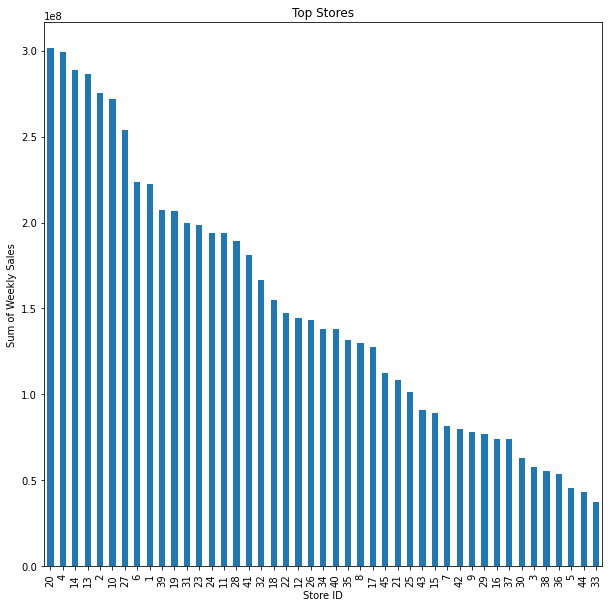

In [18]:
# Plotting the top stores with high sales
pandaplot = total_sales.plot.bar(figsize=(10,10))
pandaplot.set_title('Top Stores')
pandaplot.set_xlabel('Store ID')
pandaplot.set_ylabel('Sum of Weekly Sales')

In [21]:
# Define the dates of the Public Holiday.
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [24]:
# Filter dataframe to calculate the average Sales in Public Holiday.
Super_Bowl_sales = round(data.loc[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_sales = round(data.loc[data.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_sales = round(data.loc[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_sales = round(data.loc[data.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)
print(Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales)

1079127.99 1042427.29 1471273.43 960833.11


In [26]:
# Filter dataframe to calculate the average Sales in Non-Holiday.
non_holiday_sales = round(data[(data['Holiday_Flag'] == 0)]['Weekly_Sales'].mean(),2)
print(non_holiday_sales)

1041256.38


In [29]:
# Create Day, Month, and Year columns in the dataframe based on the Date column.
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


C:\Users\MAHAVIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MAHAVIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MAHAVIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MAHAVIR\anaconda

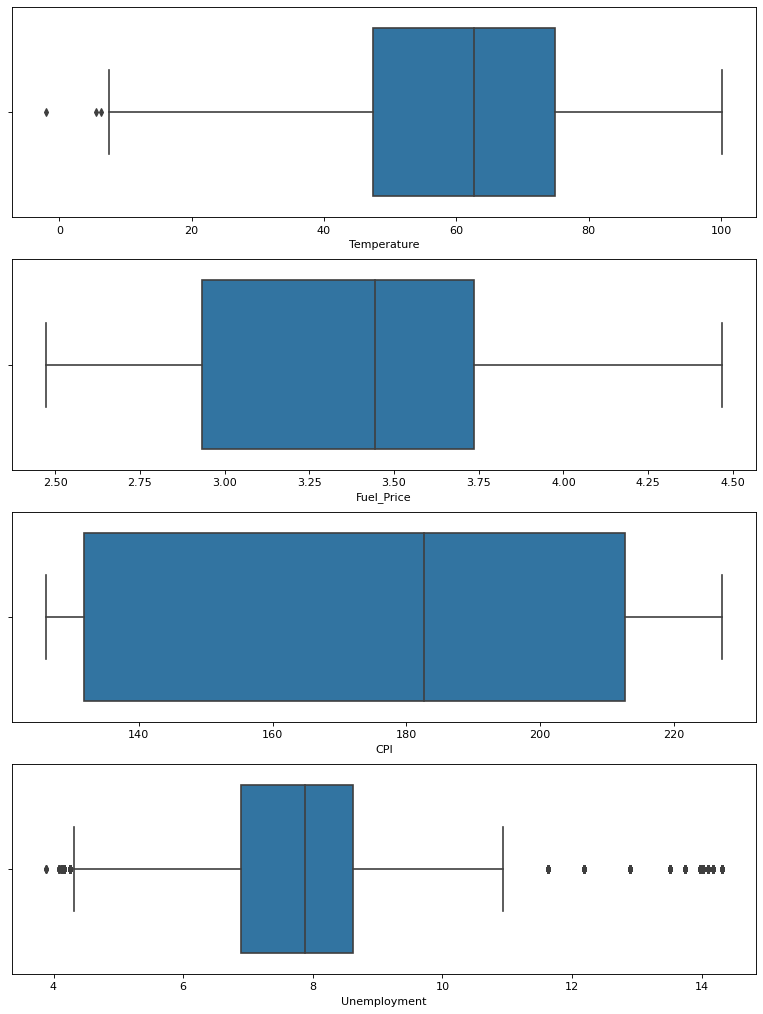

In [30]:
# Display data distribution of Temperature, Fuel Price, CPI, and Unemployment columns.
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = data[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(data[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Filter dataframe for a variant of data in Temperature and Unemployment.
data = data[data['Temperature'] >= 8]
data = data[data['Unemployment'] <= 10.5]
data = data[data['Unemployment'] >= 4.7]

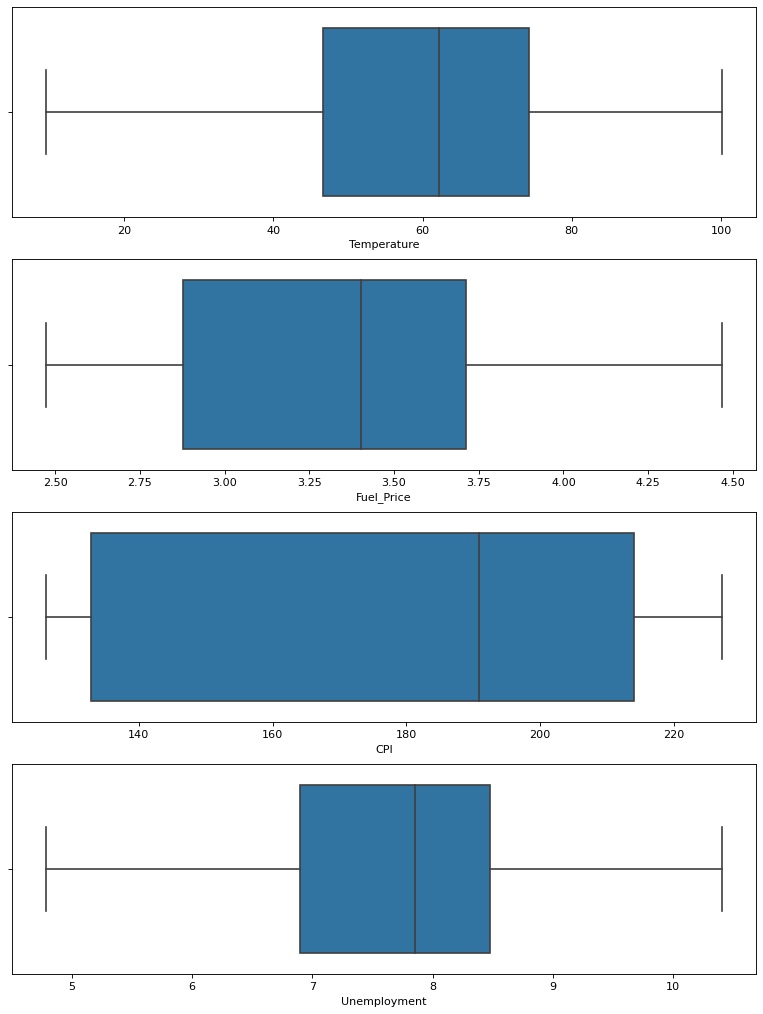

In [33]:
# Display data distribution of Temperature, Fuel Price, CPI, and Unemployment columns.
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = data[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(data[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.show(close=None, block=None)>

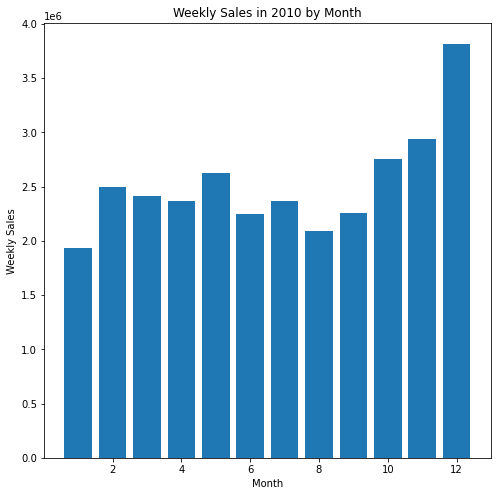

In [34]:
# Display Sales in 2010 by Month.
data_2010 = data[data.Year==2010]
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales in 2010 by Month')
plt.bar(data_2010['Month'],data_2010['Weekly_Sales'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

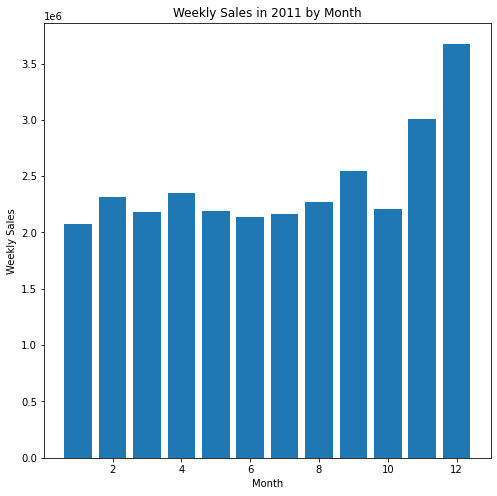

In [35]:
# Display Sales in 2011 by Month.
data_2011 = data[data.Year==2011]
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales in 2011 by Month')
plt.bar(data_2011['Month'],data_2011['Weekly_Sales'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

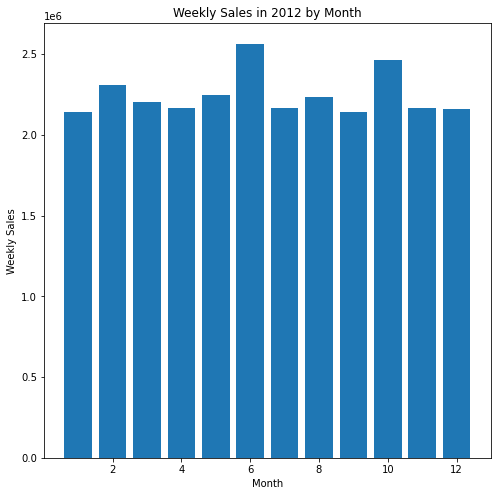

In [36]:
# Display Sales in 2012 by Month.
data_2012 = data[data.Year==2012]
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales in 2012 by Month')
plt.bar(data_2012['Month'],data_2012['Weekly_Sales'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

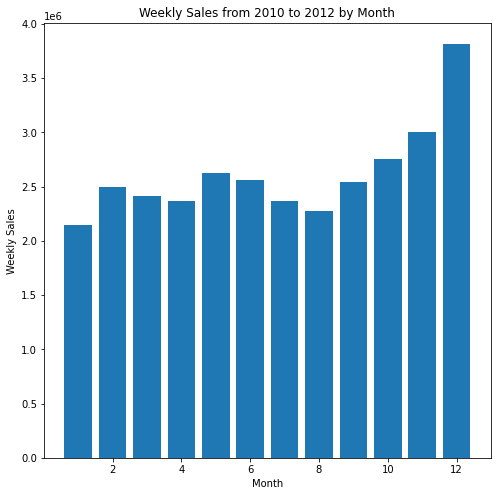

In [37]:
# Display Sales from 2010 to 2012 by Month.
plt.figure(figsize = (8, 8))
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales from 2010 to 2012 by Month')
plt.bar(data['Month'],data['Weekly_Sales'])
plt.show

In [ ]:
# Display Sales from 2010 to 2012 by Year.
plt.figure(figsize=(10,7), dpi=80)
data.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 800x560 with 0 Axes>